In [1]:
from fastai.vision.all import *

/Users/di3go/miniconda3/envs/xai-workbench/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
path = '../data/02_husky_or_wolf/'
files = get_image_files(path)

def label_func(f): return os.path.split(f)[-2]
files

(#191) [Path('../data/02_husky_or_wolf/dog/husky47.jpg'),Path('../data/02_husky_or_wolf/dog/husky6.jpg'),Path('../data/02_husky_or_wolf/dog/husky7.jpg'),Path('../data/02_husky_or_wolf/dog/husky46.jpg'),Path('../data/02_husky_or_wolf/dog/husky16 2.jpg'),Path('../data/02_husky_or_wolf/dog/husky29 2.jpg'),Path('../data/02_husky_or_wolf/dog/husky44.jpg'),Path('../data/02_husky_or_wolf/dog/husky5.jpg'),Path('../data/02_husky_or_wolf/dog/husky14 2.jpg'),Path('../data/02_husky_or_wolf/dog/husky4.jpg')...]

In [6]:
dls = ImageDataLoaders.from_name_func(
    path,
    files,
    label_func,
    item_tfms=Resize(224))

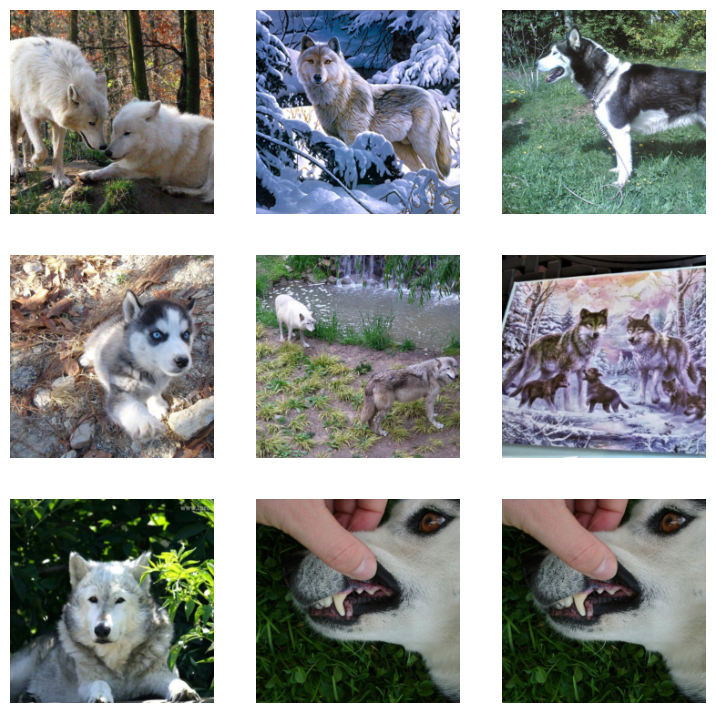

In [7]:
dls.show_batch()

In [8]:
learn = vision_learner(dls, xresnet18, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /Users/di3go/.cache/torch/hub/checkpoints/xrn50_940.pth
100%|██████████| 244M/244M [05:14<00:00, 814kB/s]  


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:12


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:19


In [ ]:
learn.show_results()

In [ ]:
#%%
from fastai.vision.all import *

#%% 
IMAGES_PATH = '../data/images/'
fnames = get_image_files(IMAGES_PATH)
dls = ImageDataLoaders.from_path_func(IMAGES_PATH, fnames, lambda x: x.parent.name, item_tfms=Resize(224))
dls.show_batch()
#%% 
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)



# %%
from fastai.callback.captum import *
captum = CaptumInterpretation (learn, cmap_name='custom blue', colors=None, N=256,
                       methods=('original_image', 'heat_map'),
                       signs=('all', 'positive'), outlier_perc=1)

#%%
import numpy as np
# %%
for id in range(5,100):
    fig = plt.figure(frameon=False)
    enc_data,dec_data, attributions = captum.visualize(fnames[id],metric='Occl',baseline_type='gauss')

    attr = attributions[0].transpose(2,0).transpose(0,1).detach().sum(-1)
    image = dec_data[0].transpose(2,0).transpose(0,1).detach()
    
    attr = np.ma.masked_array(attr, attr > 0.2)

    plt.imshow(image, cmap='brg')
    plt.imshow(attr, 
            alpha=.6, 
            cmap='viridis', 
            interpolation='bilinear')
    plt.show()